In [1]:
import numpy as np
import warnings
from sklearn.cluster import KMeans
import pylab as plt


In [2]:
# Ignore warnings
warnings.filterwarnings("ignore")


In [74]:
#datos generados aleatoriamente con seteed 1234
np.random.seed(1234)
X1 = np.random.normal(loc=5, scale=1, size=(10,1))
X2 = np.random.normal(loc=5, scale=1, size=(10,1))
X3 = np.random.normal(loc=20, scale=1, size=(10,1))
X4 = np.random.normal(loc=20, scale=1, size=(10,1))

Y1 = np.random.normal(loc=5, scale=1, size=(10,1))
Y2 = np.random.normal(loc=20, scale=1, size=(10,1))
Y3 = np.random.normal(loc=5, scale=1, size=(10,1))
Y4 = np.random.normal(loc=20, scale=1, size=(10,1))

XX = np.array(np.concatenate((X1,X2,X3,X4), axis=0))
YY = np.array(np.concatenate((Y1,Y2,Y3,Y4), axis=0))

X = np.array(np.concatenate((XX,YY), axis=1))
X = np.reshape(X, (40,2))
X.shape

(40, 2)

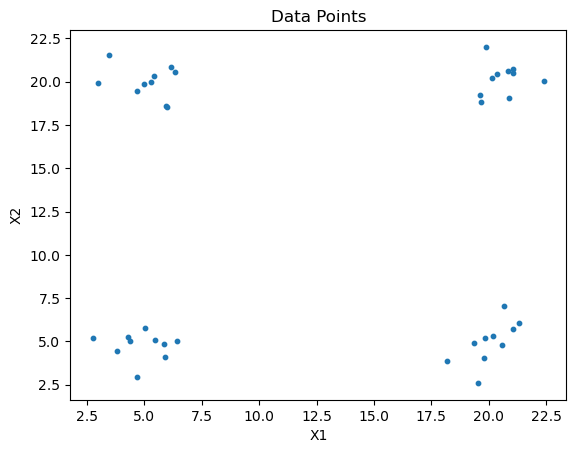

In [75]:
#plot X points
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Points')
plt.show()

# K-means

- utiliza el método del codo para seleccionar el mejor número de clusters
- Utiliza el método de la silueta para obtener el mejor número de clusters

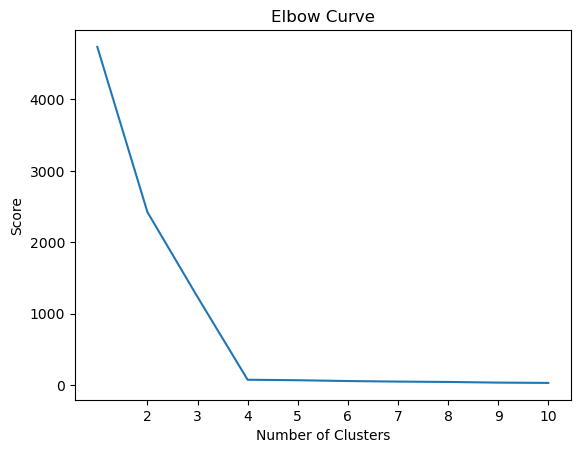

In [76]:
nclusters = 10
Nc = range(1, nclusters + 1)
score = np.zeros(nclusters)

for i in Nc:
    
    cluster1 = KMeans(n_clusters=i, n_init="auto", random_state=10)
    labels = cluster1.fit_predict(X)
    score[i-1] = -cluster1.fit(X).score(X)

score = np.asarray(score)

plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
x = np.linspace(2,nclusters,nclusters-1)
plt.xticks(x)
plt.title('Elbow Curve')
plt.show()


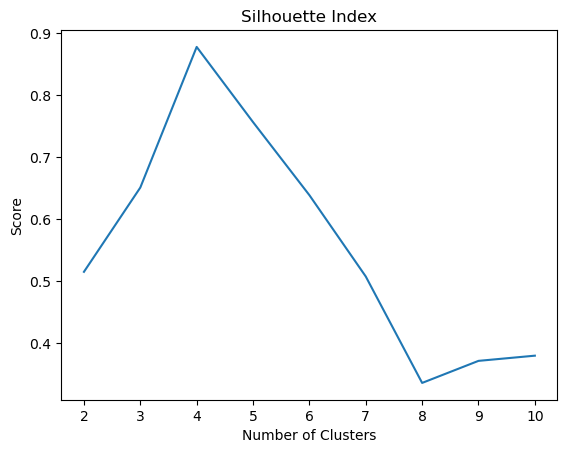

In [77]:
nclusters = 10
Nc = range(2, nclusters + 1)
from sklearn.metrics import silhouette_score
silhouette = np.zeros(nclusters-1)

for i in Nc:
    
    cluster1 = KMeans(n_clusters=i, n_init="auto", random_state=10)
    labels = cluster1.fit_predict(X)
    silhouette[i-2] = silhouette_score(X, labels)


silhouette = np.asarray(silhouette)


plt.plot(Nc,silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
x = np.linspace(2,nclusters,nclusters-1)
plt.xticks(x)
plt.title('Silhouette Index')
plt.show()


# Hierarchical

Con los mismos datos del apartado anterior:
- aplicar hierarchical clustering con linkage "complete" y distancia euclidian
- aplicar hierarchical clustering con linkage "complete" y distancia Manhattan ('cityblock')
- aplicar hierarchical clustering con linkage "single" y distancia euclidian

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage

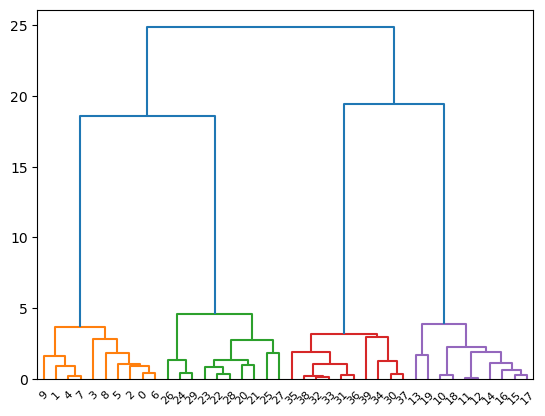

In [79]:
linkage_data = linkage(X, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.show()


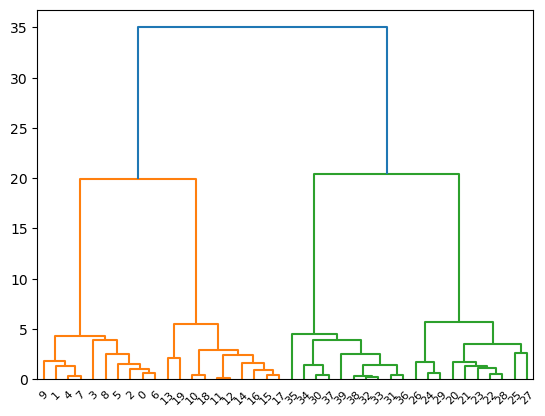

In [80]:
linkage_data = linkage(X, method='complete', metric='cityblock') # Manhattan
dendrogram(linkage_data)
plt.show()


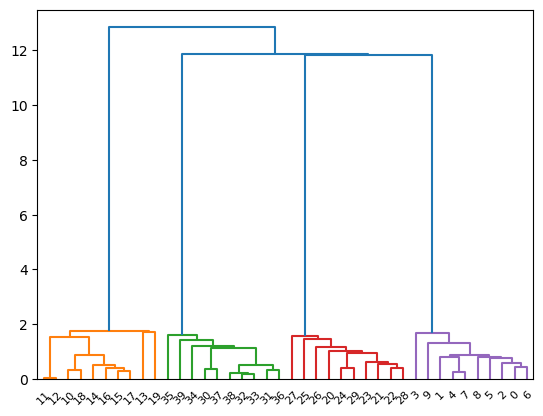

In [81]:
linkage_data = linkage(X, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.show()


# Hierarchical (II)

Con los nuevos datos generados, se pide:
- Generar hierarchical cluster con distancia euclidia y método "copmlete"
- Generar hierarchical cluster con distancia euclidia y método "single"

Para los 2 casos, se pide seleccionar con el método de la silueta el mejor cluster y dibujar los puntos con los labels de los clusters creados

In [90]:
np.random.seed(1234)
X1 = np.random.normal(loc=12.5, scale=3, size=(40,1))
Y1 = X1*1 + np.random.normal(loc=0, scale=1, size=(40,1))

X2 = np.random.normal(loc=5, scale=1, size=(10,1))
Y2 = np.random.normal(loc=20, scale=1, size=(10,1))

X3 = np.random.normal(loc=20, scale=1, size=(10,1))
Y3 = np.random.normal(loc=5, scale=1, size=(10,1))

#X4 = np.random.normal(loc=20, scale=1, size=(10,1))
#Y4 = np.random.normal(loc=20, scale=1, size=(10,1))


XX = np.array(np.concatenate((X1,X2,X3), axis=0))
YY = np.array(np.concatenate((Y1,Y2,Y3), axis=0))

X = np.array(np.concatenate((XX,YY), axis=1))
X = np.reshape(X, (60,2))
X.shape

(60, 2)

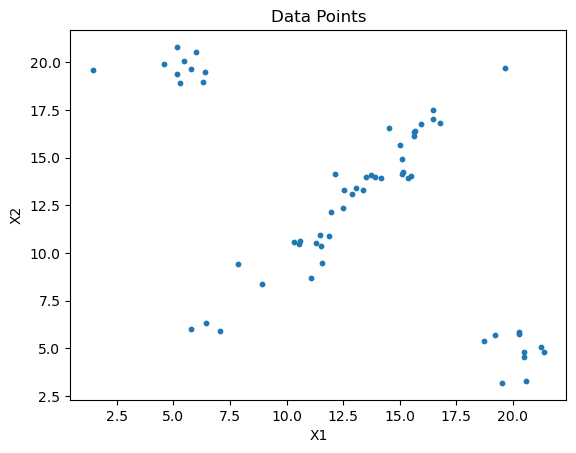

In [91]:
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Points')
plt.show()

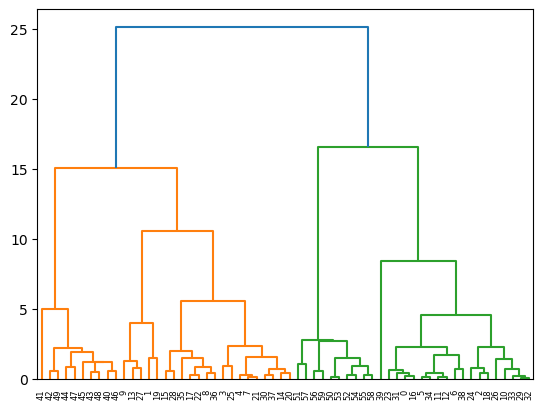

In [92]:
linkage_data = linkage(X, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.show()

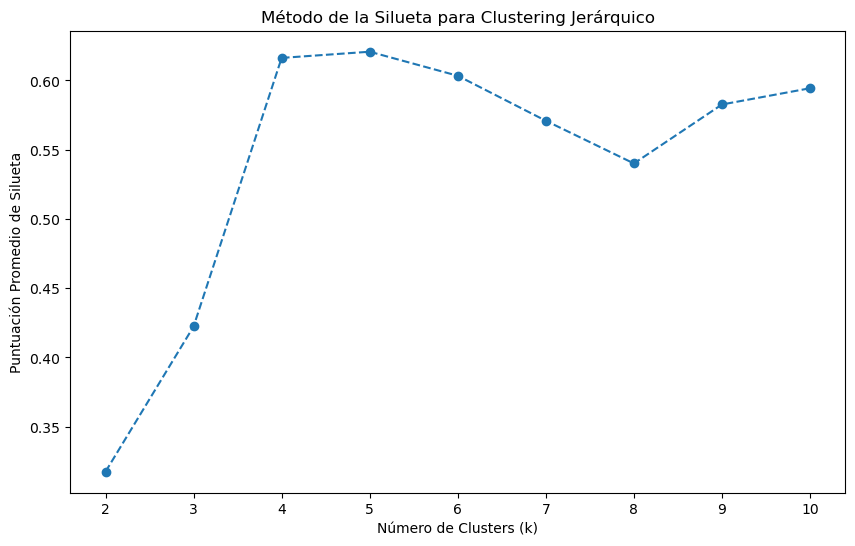


El número óptimo de clusters según el Coeficiente de Silueta es: 5


In [93]:
range_n_clusters = range(2, 11) 
silhouette_scores = []

for k in range_n_clusters:
    model = AgglomerativeClustering(
        n_clusters=k, 
        metric='euclidean', 
        linkage='complete'
    )
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Método de la Silueta para Clustering Jerárquico')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación Promedio de Silueta')
plt.show()

k_optimo = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nEl número óptimo de clusters según el Coeficiente de Silueta es: {k_optimo}")

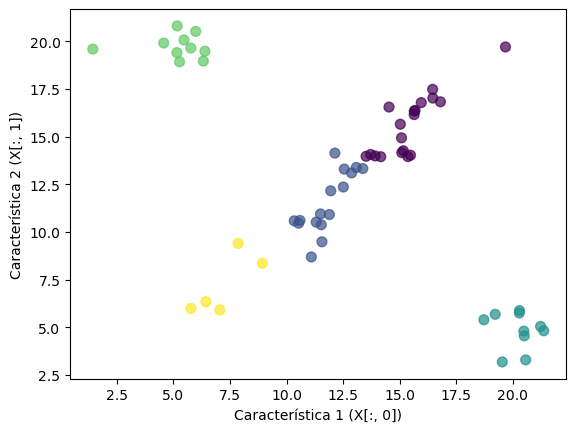

In [94]:
clustering = AgglomerativeClustering(
    n_clusters=k_optimo, 
    metric='euclidean', 
    linkage='complete'
)
labels = clustering.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

plt.xlabel('Característica 1 (X[:, 0])')
plt.ylabel('Característica 2 (X[:, 1])')
plt.show()

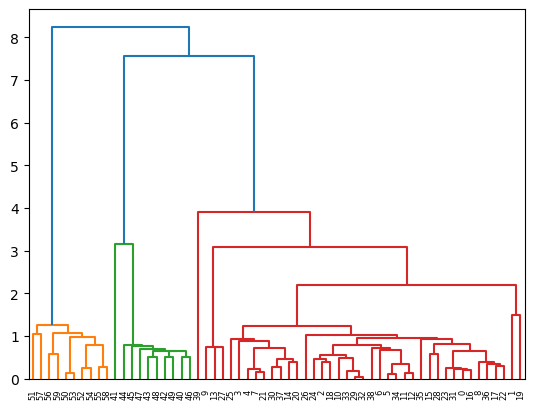

In [95]:
linkage_data = linkage(X, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.show()

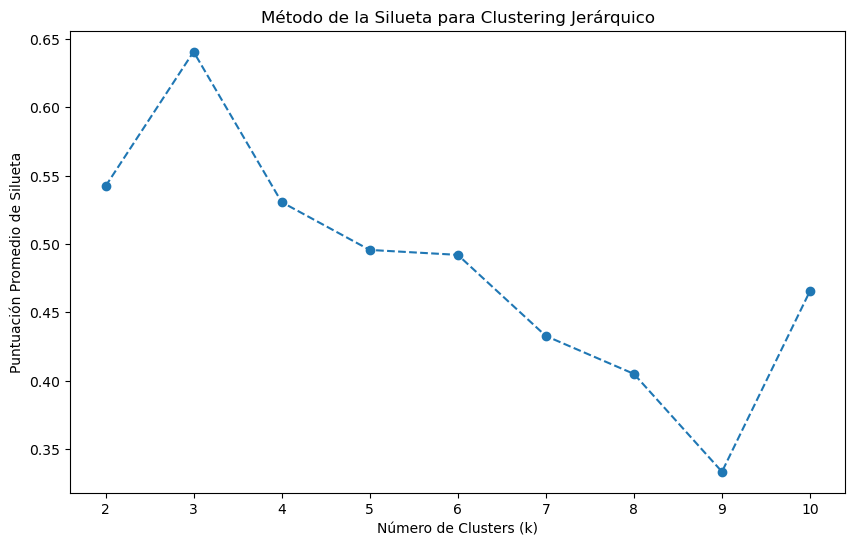


El número óptimo de clusters según el Coeficiente de Silueta es: 3


In [96]:
range_n_clusters = range(2, 11) 
silhouette_scores = []

for k in range_n_clusters:
    model = AgglomerativeClustering(
        n_clusters=k, 
        metric='euclidean', 
        linkage='single'
    )
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.title('Método de la Silueta para Clustering Jerárquico')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación Promedio de Silueta')
plt.show()

k_optimo = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nEl número óptimo de clusters según el Coeficiente de Silueta es: {k_optimo}")

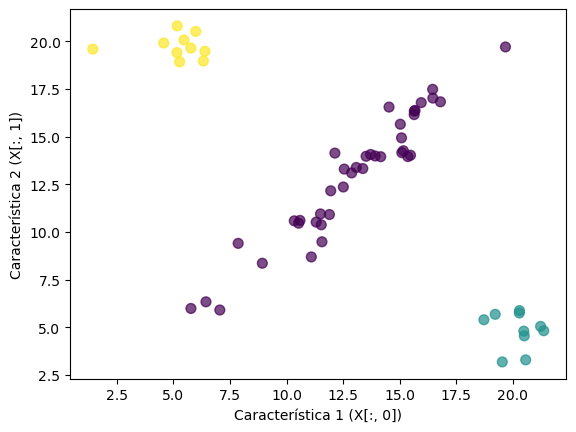

In [97]:
clustering = AgglomerativeClustering(
    n_clusters=k_optimo, 
    metric='euclidean', 
    linkage='single'
)
labels = clustering.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

plt.xlabel('Característica 1 (X[:, 0])')
plt.ylabel('Característica 2 (X[:, 1])')
plt.show()